In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import statsmodels.stats
from datetime import datetime
from IPython.core.display import display, HTML

In [2]:
from stargazer.stargazer import Stargazer

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
git_root_dir = !git rev-parse --show-toplevel
git_root_dir = git_root_dir[0]
figures_dir = os.path.join(git_root_dir, 'figures')
figures_dir

'/panfs/roc/groups/3/srivbane/levon003/repos/sna-social-support/figures'

In [7]:
init_dir = '/home/lana/shared/caringbridge/data/derived'
init_filepath = os.path.join(init_dir, "initiation_features.feather")
init_df = pd.read_feather(init_filepath)
init_df.head()

,user_id,months_before_initiation,posts_per_month,num_ints_received,num_ints_pre_init,is_first_initiation_pre_interaction,first_int_to_first_update,is_first_initiation_pre_authorship,has_received_int,first_int_received_to_first_init,recent_int_received_to_first_init,num_ints_post_init,assigned_health_cond,user_author_type,is_multiauthor,will_become_multiauthor
0,27800665,-5.067508,-0.000000,0,0,0,-540.776848,True,0,0.000000,0.000000,0,Injury,cg,0,0
1,11120609,38.489169,1.896637,17,17,0,0.307964,False,1,38.181205,31.053977,0,Injury,cg,0,0
2,3336096,68.557365,0.495935,3,3,0,0.029827,False,1,68.527538,63.483461,0,None,cg,0,0
3,21214391,6.345764,2.206196,0,0,0,-529.367272,False,0,0.000000,0.000000,0,Cancer,mixed,0,0
4,26867927,5.088479,0.196522,6,4,0,0.007379,False,1,5.081100,-4.979513,2,None,p,0,0


In [8]:
len(init_df)

26126

In [6]:
init_df.corr()

,user_id,months_before_initiation,posts_per_month,num_ints_received,num_ints_pre_init,is_first_initiation_pre_interaction,first_int_to_first_update,is_first_initiation_pre_authorship,has_received_int,first_int_received_to_first_init,recent_int_received_to_first_init,num_ints_post_init,is_multiauthor,will_become_multiauthor
user_id,1.000000,-0.743882,0.032253,0.037191,0.000243,0.095790,-0.070696,0.243685,-0.032371,-0.493861,-0.429364,0.061191,-0.095876,-0.053866
months_before_initiation,-0.743882,1.000000,-0.033857,-0.029032,0.016017,-0.084444,0.186067,-0.479924,0.134120,0.603334,0.504691,-0.065319,0.130917,0.062241
posts_per_month,0.032253,-0.033857,1.000000,0.010066,-0.000654,0.088498,0.028497,-0.032347,0.029208,-0.029662,-0.030657,0.017341,-0.005654,-0.001306
num_ints_received,0.037191,-0.029032,0.010066,1.000000,0.811168,-0.013271,0.191021,-0.106889,0.192385,0.028341,-0.212830,0.773841,0.002622,0.002412
num_ints_pre_init,0.000243,0.016017,-0.000654,0.811168,1.000000,-0.034253,0.159608,-0.089348,0.160814,0.080649,-0.100043,0.257306,0.011524,0.016051
is_first_initiation_pre_interaction,0.095790,-0.084444,0.088498,-0.013271,-0.034253,1.000000,0.186297,-0.100795,0.181418,-0.143039,-0.143727,0.015170,-0.010739,-0.014227
first_int_to_first_update,-0.070696,0.186067,0.028497,0.191021,0.159608,0.186297,1.000000,-0.588255,0.997435,0.474414,0.137955,0.142776,0.059270,0.008104
is_first_initiation_pre_authorship,0.243685,-0.479924,-0.032347,-0.106889,-0.089348,-0.100795,-0.588255,1.000000,-0.555598,-0.265117,-0.077382,-0.079853,-0.077805,-0.006539
has_received_int,-0.032371,0.134120,0.029208,0.192385,0.160814,0.181418,0.997435,-0.555598,1.000000,0.477175,0.139278,0.143724,0.052533,0.005106
first_int_received_to_first_init,-0.493861,0.603334,-0.029662,0.028341,0.080649,-0.143039,0.474414,-0.265117,0.477175,1.000000,0.756256,-0.040516,0.089913,0.045412


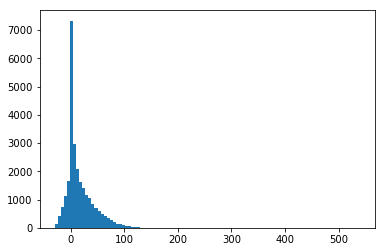

In [7]:
plt.hist(init_df.months_before_initiation, bins=100)
plt.show()

## Author type investigation

In [8]:
# all values are negative when first initiation is pre-authorship
assert np.all(init_df[init_df.is_first_initiation_pre_authorship].months_before_initiation < 0)

In [9]:
# months_before_initiation is the number of months between first authorship and first initiation
# months_before_authorship is the number of months between first initiation and first authorship
init_df['months_before_authorship'] = init_df.months_before_initiation * -1

In [10]:
pre_authorship_df = init_df[init_df.is_first_initiation_pre_authorship]
len(pre_authorship_df)

5439

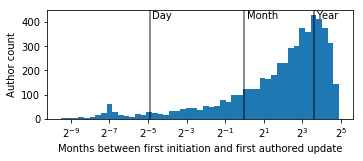

(7.768210319375487, 5.788025077160494)

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(5.47807, 2.0))
num_bins = 50
base = 2
x = np.clip(pre_authorship_df.months_before_authorship, 1 / (30 * 24), None)
logbins = np.logspace(np.log2(min(x)), np.log2(max(x)), num=num_bins, base=base, endpoint=True)
ax.hist(x, bins=logbins)
plt.xscale('log', nonposx='clip', basex=base)

# add semantically interpretable time moments
alpha=0.6
ax.axvline(1/30, color='black', alpha=alpha)
ax.axvline(1, color='black', alpha=alpha)
ax.axvline(12, color='black', alpha=alpha)
text_y = ax.transData.inverted().transform((0, ax.transAxes.transform((0, 0.95))[1]))[1]  # https://matplotlib.org/users/transforms_tutorial.html
#ax.text(1000 * 60, text_y, 'Minute', color='darkgray')
#ax.text(1000 * 60 * 60, text_y, 'Hour', color='darkgray')
#ax.text(1000 * 60 * 60 * 24, text_y, 'Day', color='darkgray')
ax.text(1/30 * 1.1, text_y, 'Day', color='black', verticalalignment='center')
ax.text(1 * 1.1, text_y, 'Month', color='black', verticalalignment='center')
ax.text(12 * 1.1, text_y, 'Year', color='black', verticalalignment='center')

plt.ylabel("Author count")
plt.xlabel("Months between first initiation and first authored update")
plt.savefig(os.path.join(figures_dir, 'init_timing_response_pre_distribution.pdf'), dpi=180, pad_inches=0)
plt.show()
np.mean(pre_authorship_df.months_before_authorship), np.median(pre_authorship_df.months_before_authorship)

In [11]:
sample1 = pre_authorship_df[pre_authorship_df.user_author_type == 'p'].months_before_authorship
sample2 = pre_authorship_df[pre_authorship_df.user_author_type == 'cg'].months_before_authorship

np.mean(sample1), \
np.mean(sample2), \
np.mean(sample2) - np.mean(sample1), \
scipy.stats.ttest_ind(sample1, sample2, equal_var=False), \
len(sample1), len(sample2), \
len(sample1) / len(pre_authorship_df), len(sample2) / len(pre_authorship_df)

(6.7805679878647585,
 8.063777128268308,
 1.2832091404035495,
 Ttest_indResult(statistic=-5.314935102443531, pvalue=1.20202735177626e-07),
 1100,
 4013,
 0.20224305938591652,
 0.7378194521051664)

In [12]:
# among CB users who will become authors, 
# patients start sites on average 1.2 months more rapidly relative to caregivers

In [13]:
f = f'months_before_authorship ~ C(user_author_type)'

model = smf.ols(formula=f, data = init_df[init_df.is_first_initiation_pre_authorship])
res = model.fit()
res.summary()

/home/srivbane/shared/anaconda3/lib/python3.7/site-packages/statsmodels/base/data.py:480: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if hasattr(x, 'ix'):


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     months_before_authorship   R-squared:                       0.005
Model:                                  OLS   Adj. R-squared:                  0.005
Method:                       Least Squares   F-statistic:                     14.11
Date:                      Mon, 13 Jan 2020   Prob (F-statistic):           7.71e-07
Time:                              14:27:10   Log-Likelihood:                -18433.
No. Observations:                      5438   AIC:                         3.687e+04
Df Residuals:                          5435   BIC:                         3.689e+04
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        8.0638      0.113     71.167      0.000       7.842       8.286
C(user_author_type)[T.mixed]    -0.6020      0.414     -1.454      0.146      -1.414       0.209
C(user_author_type)[T.p]        -1.2832      0.244     -5.253      0.000      -1.762      -0.804
==============================================================================
Omnibus:                      518.661   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.139
Skew:                           0.855   Prob(JB):                    1.11e-146
Kurtosis:                       2.794   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# subset of the data that initiated for the first time AFTER becoming authors
post_authorship_df = init_df[~init_df.is_first_initiation_pre_authorship]
len(post_authorship_df)

20687

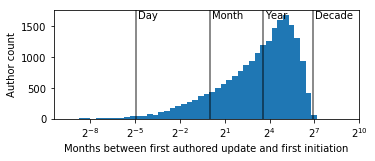

(22.319350661099083, 13.572659722222221)

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(5.47807, 2.0))
num_bins = 50
base = 2
x = np.clip(post_authorship_df.months_before_initiation, 1/ (30 * 24), None)
logbins = np.logspace(np.log2(min(x)), np.log2(max(x)), num=num_bins, base=base, endpoint=True)
ax.hist(x, bins=logbins)
plt.xscale('log', nonposx='clip', basex=base)

# add semantically interpretable time moments
alpha=0.6
ax.axvline(1/30, color='black', alpha=alpha)
ax.axvline(1, color='black', alpha=alpha)
ax.axvline(12, color='black', alpha=alpha)
ax.axvline(12 * 10, color='black', alpha=alpha)
text_y = ax.transData.inverted().transform((0, ax.transAxes.transform((0, 0.95))[1]))[1]  # https://matplotlib.org/users/transforms_tutorial.html
#ax.text(1000 * 60, text_y, 'Minute', color='darkgray')
#ax.text(1000 * 60 * 60, text_y, 'Hour', color='darkgray')
#ax.text(1000 * 60 * 60 * 24, text_y, 'Day', color='darkgray')
ax.text(1/30 * 1.1, text_y, 'Day', color='black', verticalalignment='center')
ax.text(1 * 1.1, text_y, 'Month', color='black', verticalalignment='center')
ax.text(12 * 1.1, text_y, 'Year', color='black', verticalalignment='center')
ax.text(12 * 10 * 1.1, text_y, 'Decade', color='black', verticalalignment='center')

plt.ylabel("Author count")
plt.xlabel("Months between first authored update and first initiation")
plt.savefig(os.path.join(figures_dir, 'init_timing_response_post_distribution.pdf'), dpi=180, pad_inches=0)
plt.show()
np.mean(post_authorship_df.months_before_initiation), np.median(post_authorship_df.months_before_initiation)

In [15]:
# 52.9% of authors initiate more than a year after becoming authors
np.sum(post_authorship_df.months_before_initiation >= 12) / len(post_authorship_df)

0.5291245709866099

In [16]:
sample1 = post_authorship_df[post_authorship_df.user_author_type == 'p'].months_before_initiation
sample2 = post_authorship_df[post_authorship_df.user_author_type == 'cg'].months_before_initiation

np.mean(sample1), \
np.mean(sample2), \
np.mean(sample2) - np.mean(sample1), \
scipy.stats.ttest_ind(sample1, sample2, equal_var=False), \
len(sample1), len(sample2), \
len(sample1) / len(post_authorship_df), len(sample2) / len(post_authorship_df)

(18.509829800727783,
 23.180410839612794,
 4.670581038885011,
 Ttest_indResult(statistic=-11.908749423602208, pvalue=2.0232137549551328e-32),
 4268,
 15040,
 0.2063131435200851,
 0.7270266350848359)

In [18]:
# among CB authors who will go on to initiate with other authors, 
# patients make a first initiation on average 4.7 months more rapidly compared to caregivers

In [17]:
f = f'months_before_initiation ~ C(user_author_type)'

model = smf.ols(formula=f, data = init_df[~init_df.is_first_initiation_pre_authorship])
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     months_before_initiation   R-squared:                       0.006
Model:                                  OLS   Adj. R-squared:                  0.006
Method:                       Least Squares   F-statistic:                     66.16
Date:                      Mon, 13 Jan 2020   Prob (F-statistic):           2.27e-29
Time:                              14:27:20   Log-Likelihood:                -95729.
No. Observations:                     20687   AIC:                         1.915e+05
Df Residuals:                         20684   BIC:                         1.915e+05
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       23.1804      0.202    114.882      0.000      22.785      23.576
C(user_author_type)[T.mixed]     1.5383      0.696      2.209      0.027       0.174       2.903
C(user_author_type)[T.p]        -4.6706      0.429    -10.883      0.000      -5.512      -3.829
==============================================================================
Omnibus:                    13833.567   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           724510.074
Skew:                           2.593   Prob(JB):                         0.00
Kurtosis:                      31.524   Cond. No.                         4.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# patients are more active while on the site than caregivers are (in terms of posts per month)
# but the difference is marginal...
sample1 = post_authorship_df[post_authorship_df.user_author_type == 'p'].posts_per_month
sample2 = post_authorship_df[post_authorship_df.user_author_type == 'cg'].posts_per_month

np.mean(sample1), \
np.mean(sample2), \
np.mean(sample1) - np.mean(sample2), \
scipy.stats.ttest_ind(sample1, sample2, equal_var=False)

(14.583210236570887,
 10.695599145796814,
 3.8876110907740724,
 Ttest_indResult(statistic=1.377240528013718, pvalue=0.1684843682123351))

In [19]:
# Overall, the gap between first authorship and first initiation
# is smaller for patient authors compared to caregiver authors

# One thought: is this essentially caused by a lower survival rate for patients?
# Second thought: is this interesting?  patients and caregivers just don't seem that different, so maybe?

# Regarding thought 1:
# the below analysis of interactions 

In [20]:
# Note that the "transition rate" from user to author by author type seems to be consistent
# with the underlying distribution. In other words:
# the author type distribution of user->author converts is the same as the distribution of authors who were
# never initiating users before they became authors.
# Difference in patient proportion of only 0.4 percentage points (20.6\% vs 20.2\%; $t=0.664$, $p=0.507$)

sample1 = post_authorship_df.user_author_type == 'p'
sample2 = pre_authorship_df.user_author_type == 'p'
scipy.stats.ttest_ind(sample1, sample2, equal_var=False), \
np.mean(sample1), np.mean(sample2), np.mean(sample1) - np.mean(sample2)

(Ttest_indResult(statistic=0.6638897040940227, pvalue=0.5067787729721002),
 0.2063131435200851,
 0.20224305938591652,
 0.004070084134168567)

In [21]:
# read in the interactions dataframe
metadata_dir = "/home/srivbane/shared/caringbridge/data/projects/sna-social-support/user_metadata"
author_to_site = os.path.join(metadata_dir, "interaction_metadata.h5")
ints_df = pd.read_hdf(author_to_site)
len(ints_df)

28388948

In [22]:
# as a quick fix for invalid dates in journals, when created_at is 0 we use the updated_at instead
invalid_created_at = ints_df.created_at <= 0
print(np.sum(invalid_created_at))
ints_df.loc[invalid_created_at, 'created_at'] = ints_df.loc[invalid_created_at, 'updated_at']
print(np.sum(ints_df.created_at <= 0))

44
0


In [23]:
interaction_end_date = datetime.fromisoformat('2016-06-01')
interaction_end_timestamp = int(interaction_end_date.timestamp() * 1000)
total_time_on_site = ints_df.groupby(by='user_id').agg({
    'created_at': lambda created_at: np.ptp(created_at) if np.max(created_at) <= interaction_end_timestamp else interaction_end_timestamp - np.min(created_at)
}).created_at.rename('total_time_on_site')

/home/srivbane/shared/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
total_time_on_site_dict = total_time_on_site.to_dict()

In [25]:
ms_days = 1000 * 60 * 60 * 24 * 30
init_df['total_active_time_months'] = [total_time_on_site_dict[user_id] / ms_days for user_id in init_df.user_id]

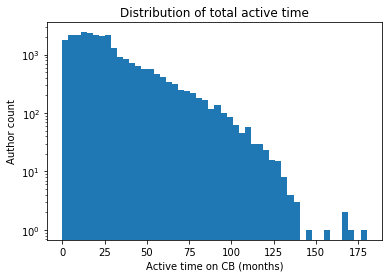

In [26]:
total_active_time_months = init_df.total_active_time_months
plt.hist(total_active_time_months, log=True, bins=50, range=(0, 12 * 15))  # first 15 years only
plt.title("Distribution of total active time")
plt.xlabel("Active time on CB (months)")
plt.ylabel("Author count")
plt.show()

In [27]:
# a tiny percentage of the data is active for more than 1 decade
np.sum(init_df.total_active_time_months >= 12 * 10) / len(init_df)

0.002679323279491694

In [28]:
sample1 = init_df[init_df.user_author_type == 'p'].total_active_time_months * 30
sample2 = init_df[init_df.user_author_type == 'cg'].total_active_time_months * 30

np.mean(sample1), \
np.mean(sample2), \
np.mean(sample2) - np.mean(sample1), \
scipy.stats.ttest_ind(sample1, sample2, equal_var=False)

(757.9879212376503,
 840.4811082122773,
 82.49318697462695,
 Ttest_indResult(statistic=-8.353251663098838, pvalue=7.549997459115162e-17))

#### pre-authorship + active time analysis

In [184]:
pre_authorship_df = init_df[init_df.is_first_initiation_pre_authorship].copy()
pre_authorship_df.months_before_initiation *= -1

In [185]:
# there's no significant difference between Patient and Caregiver active time when initiation is pre-authorship
sample1 = pre_authorship_df[pre_authorship_df.user_author_type == 'p'].total_active_time_months * 30
sample2 = pre_authorship_df[pre_authorship_df.user_author_type == 'cg'].total_active_time_months * 30

np.mean(sample1), \
np.mean(sample2), \
np.mean(sample2) - np.mean(sample1), \
scipy.stats.ttest_ind(sample1, sample2, equal_var=False)

(449.8739173505891,
 454.99591040345695,
 5.121993052867822,
 Ttest_indResult(statistic=-0.5806520596699212, pvalue=0.5615484709140249))

In [186]:
# Ps make sites a shorter time after initiating compared to CG; 1.3 months on average
sample1 = pre_authorship_df[pre_authorship_df.user_author_type == 'p'].months_before_initiation
sample2 = pre_authorship_df[pre_authorship_df.user_author_type == 'cg'].months_before_initiation

np.mean(sample1), \
np.mean(sample2), \
np.mean(sample2) - np.mean(sample1), \
scipy.stats.ttest_ind(sample1, sample2, equal_var=False)

(6.7805679878647585,
 8.063777128268308,
 1.2832091404035495,
 Ttest_indResult(statistic=-5.314935102443531, pvalue=1.20202735177626e-07))

In [187]:
# ANCOVA (main effects analysis of covariance model) for pre-authorship case
# NO LONGER AN ANCOVA MODEL; AN INTERACTION TERM WAS SIGNIFICANT AFTER LOG TRANSFORMATION
# compared to caregivers, much sooner
f = 'np.log(months_before_initiation) ~ np.log(total_active_time_months) * C(user_author_type)'
model = smf.ols(formula=f, data = pre_authorship_df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     np.log(months_before_initiation)   R-squared:                       0.310
Model:                                          OLS   Adj. R-squared:                  0.310
Method:                               Least Squares   F-statistic:                     489.2
Date:                              Mon, 13 Jan 2020   Prob (F-statistic):               0.00
Time:                                      19:30:02   Log-Likelihood:                -10699.
No. Observations:                              5438   AIC:                         2.141e+04
Df Residuals:                                  5432   BIC:                         2.145e+04
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        -1.6215      0.078    -20.720      0.000      -1.775      -1.468
C(user_author_type)[T.mixed]                                     -0.6928      0.264     -2.622      0.009      -1.211      -0.175
C(user_author_type)[T.p]                                         -1.2148      0.166     -7.300      0.000      -1.541      -0.889
np.log(total_active_time_months)                                  1.1660      0.030     38.879      0.000       1.107       1.225
np.log(total_active_time_months):C(user_author_type)[T.mixed]     0.1657      0.102      1.630      0.103      -0.034       0.365
np.log(total_active_time_months):C(user_author_type)[T.p]         0.2607      0.064      4.082      0.000       0.136       0.386
==============================================================================
Omnibus:                     2324.852   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10439.717
Skew:                          -2.089   Prob(JB):                         0.00
Kurtosis:                       8.350   Cond. No.                         34.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
print(res.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                                                     & np.log(months_before_initiation) & \textbf{  R-squared:         } &     0.310   \\
\textbf{Model:}                                                             &               OLS                & \textbf{  Adj. R-squared:    } &     0.310   \\
\textbf{Method:}                                                            &          Least Squares           & \textbf{  F-statistic:       } &     489.2   \\
\textbf{Date:}                                                              &         Mon, 13 Jan 2020         & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}                                                              &             19:30:03             & \textbf{  Log-Likelihood:    } &   -10699.   \\
\textbf{No. Observations:}                                                  &                5438              & \textbf{  AIC:               } & 2.1

In [189]:
# ANOVA for the interaction
# unlike post-authorship, there is no interaction with author type
md0 = smf.ols('np.log(months_before_initiation) ~ np.log(total_active_time_months)', data=pre_authorship_df).fit()
md1 = smf.ols('np.log(months_before_initiation) ~ np.log(total_active_time_months) + C(user_author_type)', data=pre_authorship_df).fit()
md2 = smf.ols('np.log(months_before_initiation) ~ np.log(total_active_time_months) * C(user_author_type)', data=pre_authorship_df).fit()
anovaResults = statsmodels.stats.anova.anova_lm(md0, md1, md2, typ=1)
print(anovaResults)

   df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    5437.0  16639.890127      0.0         NaN        NaN           NaN
1    5434.0  16339.886340      3.0  300.003787  33.353293  2.356883e-21
2    5432.0  16286.453437      2.0   53.432904   8.910704  1.369193e-04


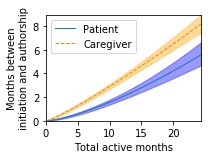

In [190]:
# plot the effects of the interaction
# confidence vs prediction intervals: https://stats.stackexchange.com/questions/16493/difference-between-confidence-intervals-and-prediction-intervals
color_dict = {
    'p': 'blue',
    'cg': 'orange',
    'mixed': 'green'
}
label_dict = {
    'p': 'Patient',
    'cg': 'Caregiver',
    'mixed': 'Mixed'
}

day_start = 1
day_end = 365 * 2
fig, ax = plt.subplots(1, 1, figsize=(5.47807 / 2, 2.0))
for author_type in ['p', 'cg']:
    alpha = 0.3 if author_type == 'mixed' else 1.0
    total_active_time_months = np.linspace(day_start / 30, day_end / 30, num=50)
    user_author_type = [author_type for i in range(len(total_active_time_months))]
    preds = res.predict(exog=dict(total_active_time_months=total_active_time_months, user_author_type=user_author_type))
    plt.plot(total_active_time_months, np.exp(preds), label=label_dict[author_type], alpha=alpha, linewidth=1,
            linestyle="--" if author_type == 'cg' else "-")
    
    predictions = res.get_prediction(exog=dict(total_active_time_months=total_active_time_months, user_author_type=user_author_type))
    pred_ci_df = predictions.summary_frame(alpha=0.01)    
    ax.fill_between(total_active_time_months, 
                    np.exp(pred_ci_df.mean_ci_lower.rename('')), 
                    np.exp(pred_ci_df.mean_ci_upper.rename('')),
                    color=color_dict[author_type], alpha=alpha * 0.4)

    if author_type == 'cg':
        # print linear trend line for visual comparison
        xs = total_active_time_months
        ys = total_active_time_months + np.exp(preds[0])
        #plt.plot(xs, ys, color='black', linestyle='--', linewidth=1)
        cg_preds = np.exp(preds)
    else:
        p_preds = np.exp(preds)
        

#sdf = post_authorship_df[post_authorship_df.total_active_time_months <= day_end / 30].sample(n=2000)
#plt.scatter(sdf.total_active_time_months, sdf.months_before_initiation.rename(''), 
#            color=[color_dict[at] for at in sdf.user_author_type], alpha=0.4)

#plt.axhline(0, color='black', alpha=0.2)

plt.legend()
#plt.xlabel("Total months active on CB (pre- and post-initiation)")
plt.xlabel("Total active months")
plt.ylabel("Months between\ninitiation and authorship")
#plt.title("Effects plot for interaction model")
plt.tight_layout(pad=0)
plt.margins(0,0)
plt.savefig(os.path.join(figures_dir, 'init_timing_effects_plot_pre.pdf'), dpi=180, pad_inches=0)
plt.show()

In [194]:
for author_type in ['p', 'cg']:
    total_active_time_months = [1, 6, 12, 24, 36, 48]
    user_author_type = [author_type for i in range(len(total_active_time_months))]
    preds = res.predict(exog=dict(total_active_time_months=total_active_time_months, user_author_type=user_author_type))
    if author_type == 'cg':
        cg_preds = np.exp(preds)
    else:
        p_preds = np.exp(preds)
(cg_preds - p_preds) * 30

0      4.168731
1     25.213108
2     46.497739
3     77.245665
4     94.623862
5    100.508458
dtype: float64

#### post-authorship + active time analysis

In [195]:
post_authorship_df = init_df[~init_df.is_first_initiation_pre_authorship]

sample1 = post_authorship_df[post_authorship_df.user_author_type == 'p'].total_active_time_months * 30
sample2 = post_authorship_df[post_authorship_df.user_author_type == 'cg'].total_active_time_months * 30

np.mean(sample1), \
np.mean(sample2), \
np.mean(sample2) - np.mean(sample1), \
scipy.stats.ttest_ind(sample1, sample2, equal_var=False)

(837.3987469817363,
 943.3369658457069,
 105.93821886397063,
 Ttest_indResult(statistic=-8.982714099813403, pvalue=3.2723041970204805e-19))

In [196]:
# Caregivers are on CB for, on average, 105.9 additional days, compared to patients.
# Citing Ma et al. and Levonian et al., we expect that some of this effect is determined by declining health/death of patients

In [197]:
# Patients initiate 4.7 months sooner than CGs, on average, after becoming authors
post_authorship_df = init_df[~init_df.is_first_initiation_pre_authorship]

sample1 = post_authorship_df[post_authorship_df.user_author_type == 'p'].months_before_initiation
sample2 = post_authorship_df[post_authorship_df.user_author_type == 'cg'].months_before_initiation

np.mean(sample1), \
np.mean(sample2), \
np.mean(sample2) - np.mean(sample1), \
scipy.stats.ttest_ind(sample1, sample2, equal_var=False)

(18.509829800727783,
 23.180410839612794,
 4.670581038885011,
 Ttest_indResult(statistic=-11.908749423602208, pvalue=2.0232137549551328e-32))

In [198]:
# ANCOVA (main effects analysis of covariance model)
# small sublinear trend on total_active_time_months
# significantly reduced role of author type, but still present
f = 'months_before_initiation ~ total_active_time_months + C(user_author_type)'
model = smf.ols(formula=f, data = post_authorship_df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     months_before_initiation   R-squared:                       0.859
Model:                                  OLS   Adj. R-squared:                  0.859
Method:                       Least Squares   F-statistic:                 4.216e+04
Date:                      Mon, 13 Jan 2020   Prob (F-statistic):               0.00
Time:                              19:33:00   Log-Likelihood:                -75499.
No. Observations:                     20687   AIC:                         1.510e+05
Df Residuals:                         20683   BIC:                         1.510e+05
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -6.1269      0.112    -54.580      0.000      -6.347      -5.907
C(user_author_type)[T.mixed]    -0.4912      0.262     -1.875      0.061      -1.005       0.022
C(user_author_type)[T.p]        -1.3793      0.162     -8.531      0.000      -1.696      -1.062
total_active_time_months         0.9320      0.003    354.310      0.000       0.927       0.937
==============================================================================
Omnibus:                    30175.134   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        183052589.623
Skew:                           7.756   Prob(JB):                         0.00
Kurtosis:                     463.573   Cond. No.                         162.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
# Interaction model
f = 'np.log(months_before_initiation) ~ np.log(total_active_time_months) * C(user_author_type)'
model = smf.ols(formula=f, data = post_authorship_df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     np.log(months_before_initiation)   R-squared:                       0.542
Model:                                          OLS   Adj. R-squared:                  0.542
Method:                               Least Squares   F-statistic:                     4899.
Date:                              Mon, 13 Jan 2020   Prob (F-statistic):               0.00
Time:                                      19:33:00   Log-Likelihood:                -33771.
No. Observations:                             20687   AIC:                         6.755e+04
Df Residuals:                                 20681   BIC:                         6.760e+04
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        -1.8437      0.032    -57.433      0.000      -1.907      -1.781
C(user_author_type)[T.mixed]                                     -0.0897      0.108     -0.831      0.406      -0.301       0.122
C(user_author_type)[T.p]                                         -0.3996      0.071     -5.599      0.000      -0.539      -0.260
np.log(total_active_time_months)                                  1.3251      0.010    133.376      0.000       1.306       1.345
np.log(total_active_time_months):C(user_author_type)[T.mixed]     0.0187      0.033      0.569      0.570      -0.046       0.083
np.log(total_active_time_months):C(user_author_type)[T.p]         0.0616      0.023      2.720      0.007       0.017       0.106
==============================================================================
Omnibus:                    10146.537   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70370.259
Skew:                          -2.277   Prob(JB):                         0.00
Kurtosis:                      10.804   Cond. No.                         45.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
# can generate some useful latex info
for line in res.summary2().as_latex().split("\n")[17:19+13]:
    print(line)

\begin{tabular}{lcccccc}
\hline
                                                                   &  Coef.  & Std.Err. &    t     & P$>$$|$t$|$ &  [0.025 &  0.975]  \\
\hline
\hline
\end{tabular}
\begin{tabular}{lrrrrrr}
Intercept                                                          & -1.8437 &   0.0321 & -57.4332 &      0.0000 & -1.9066 & -1.7807  \\
C(user\_author\_type)[T.mixed]                                     & -0.0897 &   0.1079 &  -0.8312 &      0.4059 & -0.3012 &  0.1218  \\
C(user\_author\_type)[T.p]                                         & -0.3996 &   0.0714 &  -5.5993 &      0.0000 & -0.5395 & -0.2597  \\
np.log(total\_active\_time\_months)                                &  1.3251 &   0.0099 & 133.3760 &      0.0000 &  1.3056 &  1.3446  \\
np.log(total\_active\_time\_months):C(user\_author\_type)[T.mixed] &  0.0187 &   0.0329 &   0.5687 &      0.5696 & -0.0457 &  0.0831  \\
np.log(total\_active\_time\_months):C(user\_author\_type)[T.p]     &  0.0616 &   0.0227 &   2

In [201]:
# parameters with a "day" interpretation
# e.g. total_active_time_months:C(user_author_type)[T.p]: 
# for patients, each additional month active is associated with initiating a little more than half a day earlier
# total_active_time_month
# for caregivers, a 30 day increase in total time on CB is associated with initiating 28 days earlier; this 2-day gap indicates that initiation is more likely to occur earlier (? need better way to articulate this effect)
res.params * 30

Intercept                                                       -55.309990
C(user_author_type)[T.mixed]                                     -2.690436
C(user_author_type)[T.p]                                        -11.987388
np.log(total_active_time_months)                                 39.753256
np.log(total_active_time_months):C(user_author_type)[T.mixed]     0.560583
np.log(total_active_time_months):C(user_author_type)[T.p]         1.849396
dtype: float64

In [202]:
np.min(post_authorship_df.total_active_time_months), np.max(post_authorship_df.total_active_time_months)

(0.03402816358024691, 562.8015509259259)

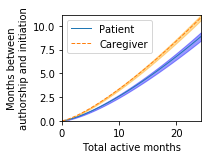

In [203]:
# plot the effects of the interaction
# confidence vs prediction intervals: https://stats.stackexchange.com/questions/16493/difference-between-confidence-intervals-and-prediction-intervals
color_dict = {
    'p': 'blue',
    'cg': 'orange',
    'mixed': 'green'
}
label_dict = {
    'p': 'Patient',
    'cg': 'Caregiver',
    'mixed': 'Mixed'
}

day_start = 1
day_end = 365 * 2
fig, ax = plt.subplots(1, 1, figsize=(5.47807 / 2, 2.0))
for author_type in ['p', 'cg']:
    alpha = 0.3 if author_type == 'mixed' else 1.0
    total_active_time_months = np.linspace(day_start / 30, day_end / 30, num=50)
    user_author_type = [author_type for i in range(len(total_active_time_months))]
    preds = res.predict(exog=dict(total_active_time_months=total_active_time_months, user_author_type=user_author_type))
    plt.plot(total_active_time_months, np.exp(preds), label=label_dict[author_type], alpha=alpha, linewidth=1,
            linestyle="--" if author_type == 'cg' else "-")
    
    predictions = res.get_prediction(exog=dict(total_active_time_months=total_active_time_months, user_author_type=user_author_type))
    pred_ci_df = predictions.summary_frame(alpha=0.01)    
    ax.fill_between(total_active_time_months, 
                    np.exp(pred_ci_df.mean_ci_lower.rename('')), 
                    np.exp(pred_ci_df.mean_ci_upper.rename('')),
                    color=color_dict[author_type], alpha=alpha * 0.4)

    if author_type == 'cg':
        # print linear trend line for visual comparison
        xs = total_active_time_months
        ys = total_active_time_months + np.exp(preds[0])
        #plt.plot(xs, ys, color='black', linestyle='--', linewidth=1)
        cg_preds = np.exp(preds)
    else:
        p_preds = np.exp(preds)
        

#sdf = post_authorship_df[post_authorship_df.total_active_time_months <= day_end / 30].sample(n=2000)
#plt.scatter(sdf.total_active_time_months, sdf.months_before_initiation.rename(''), 
#            color=[color_dict[at] for at in sdf.user_author_type], alpha=0.4)

#plt.axhline(0, color='black', alpha=0.2)

plt.legend()
plt.xlabel("Total active months")
plt.ylabel("Months between\nauthorship and initiation")
#plt.title("Effects plot for interaction model")
plt.tight_layout(pad=0)
plt.margins(0,0)
plt.savefig(os.path.join(figures_dir, 'init_timing_effects_plot_post.pdf'), dpi=180, pad_inches=0)
plt.show()

In [204]:
for author_type in ['p', 'cg']:
    total_active_time_months = [1, 6, 12, 24, 36, 48]
    user_author_type = [author_type for i in range(len(total_active_time_months))]
    preds = res.predict(exog=dict(total_active_time_months=total_active_time_months, user_author_type=user_author_type))
    if author_type == 'cg':
        cg_preds = np.exp(preds)
    else:
        p_preds = np.exp(preds)

In [205]:
(cg_preds - p_preds) * 30

0      1.563681
1     12.804868
2     27.905089
3     58.992344
4     89.644602
5    119.240301
dtype: float64

In [43]:
# the decreased slope of the patient line relative to the caregiver line
# indicates that patients do in fact initiate earlier than caregivers do
# the fact that both trends are sub-linear indicates 

In [44]:
# interestingly, a sublinear relationship between total user tenure on CB
# and the time between authorship and first initiation
# i.e. for each additional day that will be spent by this user on the site, the average first initiation time is earlier than you would predict if the timing of the first initiation was entirely a function of the percent of time spent on the site
0.0233 * 30

0.6990000000000001

In [136]:
# ANOVA for the interaction
# the interaction is significant at the 95% confidence level
md0 = smf.ols('np.log(months_before_initiation) ~ np.log(total_active_time_months)', data=post_authorship_df).fit()
md1 = smf.ols('np.log(months_before_initiation) ~ np.log(total_active_time_months) + C(user_author_type)', data=post_authorship_df).fit()
md2 = smf.ols('np.log(months_before_initiation) ~ np.log(total_active_time_months) * C(user_author_type)', data=post_authorship_df).fit()
anovaResults = statsmodels.stats.anova.anova_lm(md0, md1, md2, typ=1)
print(anovaResults)

   df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0   20685.0  31873.952974      0.0         NaN        NaN           NaN
1   20683.0  31720.929144      2.0  153.023831  49.901197  2.400517e-22
2   20681.0  31709.518345      2.0   11.410798   3.721071  2.422425e-02


In [46]:
import patsy
f = f'months_before_initiation ~ total_active_time_months + C(user_author_type) + C(user_author_type) : total_active_time_months'
y,X = patsy.dmatrices(f, post_authorship_df, return_type='dataframe')
y.shape, X.shape

((20687, 1), (20687, 6))

In [47]:
# no obvious multicolinearity problems...
X.corr()

,Intercept,C(user_author_type)[T.mixed],C(user_author_type)[T.p],total_active_time_months,C(user_author_type)[T.mixed]:total_active_time_months,C(user_author_type)[T.p]:total_active_time_months
Intercept,NaN,NaN,NaN,NaN,NaN,NaN
C(user_author_type)[T.mixed],NaN,1.000000,-0.136255,0.029932,0.773998,-0.102222
C(user_author_type)[T.p],NaN,-0.136255,1.000000,-0.060971,-0.105461,0.750222
total_active_time_months,NaN,0.029932,-0.060971,1.000000,0.199396,0.221269
C(user_author_type)[T.mixed]:total_active_time_months,NaN,0.773998,-0.105461,0.199396,1.000000,-0.079119
C(user_author_type)[T.p]:total_active_time_months,NaN,-0.102222,0.750222,0.221269,-0.079119,1.000000


## Omnibus model

In [69]:
int_feats = 'has_received_int + first_int_to_first_update : has_received_int '
multiauthor_feats = 'is_multiauthor + will_become_multiauthor'
f = f'months_before_initiation ~ {int_feats} + {multiauthor_feats} + C(assigned_health_cond) + C(user_author_type)'

model = smf.ols(formula=f, data = init_df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     months_before_initiation   R-squared:                       0.116
Model:                                  OLS   Adj. R-squared:                  0.115
Method:                       Least Squares   F-statistic:                     228.3
Date:                      Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                              16:59:00   Log-Likelihood:            -1.2002e+05
No. Observations:                     26125   AIC:                         2.401e+05
Df Residuals:                         26109   BIC:                         2.402e+05
Df Model:                                15                                         
Covariance Type:                  nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                13.9468      0.342     40.797      0.000      13.277      14.617
C(assigned_health_cond)[T.Cardiovascular/Stroke]         -0.6374      0.809     -0.787      0.431      -2.224       0.949
C(assigned_health_cond)[T.Condition Unknown]             22.2140      2.643      8.404      0.000      17.033      27.395
C(assigned_health_cond)[T.Congenital/Immune Disorder]    -6.5656      1.862     -3.527      0.000     -10.214      -2.917
C(assigned_health_cond)[T.Infant/Childbirth]              2.2990      1.062      2.164      0.030       0.217       4.381
C(assigned_health_cond)[T.Injury]                         0.9338      0.888      1.051      0.293      -0.808       2.675
C(assigned_health_cond)[T.Neurological Condition]         2.3263      0.976      2.384      0.017       0.413       4.239
C(assigned_health_cond)[T.None]                          -4.9977      0.344    -14.519      0.000      -5.672      -4.323
C(assigned_health_cond)[T.Other]                         19.0683      0.704     27.075      0.000      17.688      20.449
C(assigned_health_cond)[T.Surgery/Transplantation]        5.3029      0.827      6.411      0.000       3.682       6.924
C(user_author_type)[T.mixed]                              1.9229      0.607      3.166      0.002       0.732       3.113
C(user_author_type)[T.p]                                 -3.0585      0.378     -8.087      0.000      -3.800      -2.317
has_received_int                                          4.9413      0.302     16.383      0.000       4.350       5.533
first_int_to_first_update:has_received_int                0.7097      0.025     28.130      0.000       0.660       0.759
is_multiauthor                                           19.5659      1.289     15.177      0.000      17.039      22.093
will_become_multiauthor                                  -2.1454      0.830     -2.585      0.010      -3.772      -0.519
==============================================================================
Omnibus:                    15141.575   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           439215.611
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                      22.569   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# post-authorship model
int_feats = 'has_received_int + first_int_to_first_update : has_received_int '
multiauthor_feats = 'is_multiauthor'
f = f'months_before_initiation ~ {int_feats} + {multiauthor_feats} + C(assigned_health_cond, Treatment(reference=\'None\')) + C(user_author_type)'

model = smf.ols(formula=f, data = init_df[~init_df.is_first_initiation_pre_authorship])
post_res = model.fit()
post_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     months_before_initiation   R-squared:                       0.128
Model:                                  OLS   Adj. R-squared:                  0.127
Method:                       Least Squares   F-statistic:                     216.3
Date:                      Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                              18:15:04   Log-Likelihood:                -94381.
No. Observations:                     20687   AIC:                         1.888e+05
Df Residuals:                         20672   BIC:                         1.889e+05
Df Model:                                14                                         
Covariance Type:                  nonrobust                                         
======================================================================================================================================================
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                             25.6960      0.355     72.410      0.000      25.000      26.392
C(assigned_health_cond, Treatment(reference='None'))[T.Cancer]                         3.4493      0.374      9.226      0.000       2.717       4.182
C(assigned_health_cond, Treatment(reference='None'))[T.Cardiovascular/Stroke]          3.1722      0.859      3.691      0.000       1.488       4.857
C(assigned_health_cond, Treatment(reference='None'))[T.Condition Unknown]             20.1020      2.574      7.809      0.000      15.056      25.148
C(assigned_health_cond, Treatment(reference='None'))[T.Congenital/Immune Disorder]    -3.4404      1.997     -1.723      0.085      -7.355       0.474
C(assigned_health_cond, Treatment(reference='None'))[T.Infant/Childbirth]              4.5510      1.089      4.178      0.000       2.416       6.686
C(assigned_health_cond, Treatment(reference='None'))[T.Injury]                         5.4327      0.936      5.804      0.000       3.598       7.267
C(assigned_health_cond, Treatment(reference='None'))[T.Neurological Condition]         6.2929      1.038      6.060      0.000       4.257       8.328
C(assigned_health_cond, Treatment(reference='None'))[T.Other]                         19.1338      0.695     27.521      0.000      17.771      20.497
C(assigned_health_cond, Treatment(reference='None'))[T.Surgery/Transplantation]        8.0032      0.860      9.304      0.000       6.317       9.689
C(user_author_type)[T.mixed]                                                           1.5716      0.654      2.402      0.016       0.289       2.854
C(user_author_type)[T.p]                                                              -3.9264      0.412     -9.530      0.000      -4.734      -3.119
has_received_int                                                                     -10.4753      0.350    -29.968      0.000     -11.160      -9.790
first_int_to_first_update:has_received_int                                             0.7318      0.024     29.939      0.000       0.684       0.780
is_multiauthor                                                                        12.6709      0.979     12.938      0.000      10.751      14.590
==============================================================================
Omnibus:                    12829.455   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           510229.871
Skew:                           2.394   Prob(JB):             

In [97]:
pre_authorship_df = init_df[init_df.is_first_initiation_pre_authorship].copy()
pre_authorship_df.months_before_initiation *= -1

f = f'months_before_initiation ~ will_become_multiauthor + C(assigned_health_cond, Treatment(reference=\'None\')) + C(user_author_type)'

model = smf.ols(formula=f, data = pre_authorship_df)
pre_res = model.fit()
pre_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     months_before_initiation   R-squared:                       0.008
Model:                                  OLS   Adj. R-squared:                  0.006
Method:                       Least Squares   F-statistic:                     3.531
Date:                      Sun, 05 Jan 2020   Prob (F-statistic):           3.03e-05
Time:                              18:15:26   Log-Likelihood:                -18426.
No. Observations:                      5438   AIC:                         3.688e+04
Df Residuals:                          5425   BIC:                         3.696e+04
Df Model:                                12                                         
Covariance Type:                  nonrobust                                         
======================================================================================================================================================
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                              8.0488      0.139     58.094      0.000       7.777       8.320
C(assigned_health_cond, Treatment(reference='None'))[T.Cancer]                         0.2411      0.234      1.031      0.303      -0.217       0.700
C(assigned_health_cond, Treatment(reference='None'))[T.Cardiovascular/Stroke]          0.5972      0.526      1.134      0.257      -0.435       1.629
C(assigned_health_cond, Treatment(reference='None'))[T.Condition Unknown]             -3.1058      7.176     -0.433      0.665     -17.175      10.963
C(assigned_health_cond, Treatment(reference='None'))[T.Congenital/Immune Disorder]    -1.1974      1.275     -0.939      0.348      -3.696       1.301
C(assigned_health_cond, Treatment(reference='None'))[T.Infant/Childbirth]             -1.3556      0.886     -1.530      0.126      -3.093       0.382
C(assigned_health_cond, Treatment(reference='None'))[T.Injury]                         0.3802      0.611      0.623      0.534      -0.817       1.577
C(assigned_health_cond, Treatment(reference='None'))[T.Neurological Condition]         0.4054      0.657      0.617      0.537      -0.882       1.692
C(assigned_health_cond, Treatment(reference='None'))[T.Other]                         -1.4030      0.813     -1.725      0.085      -2.997       0.191
C(assigned_health_cond, Treatment(reference='None'))[T.Surgery/Transplantation]        0.4259      0.609      0.699      0.485      -0.768       1.620
C(user_author_type)[T.mixed]                                                          -0.5680      0.415     -1.368      0.171      -1.382       0.246
C(user_author_type)[T.p]                                                              -1.3299      0.248     -5.364      0.000      -1.816      -0.844
will_become_multiauthor                                                               -0.8453      0.438     -1.930      0.054      -1.704       0.013
==============================================================================
Omnibus:                      515.490   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.681
Skew:                           0.851   Prob(JB):                    1.71e-145
Kurtosis:                       2.792   Cond. No.                         78.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
display(HTML(Stargazer([pre_res, post_res]).render_html()))

In [109]:
# light manipulation of the stargazer output
for line in Stargazer([pre_res, post_res]).render_latex().split("\n"):
    if line.startswith("  & & \\"):
        continue
    if "assigned_health_cond" in line:
        line = "HC = " + line[56:]
    line = line.replace("_", "-")
    print(line)

\begin{table}[!htbp] \centering
  \label{}
\begin{tabular}{@{\extracolsep{5pt}}lcc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{2}{c}{\textit{Dependent variable:}} \
\cr \cline{2-3}
\\[-1.8ex] & (1) & (2) \\
\hline \\[-1.8ex]
HC = Cancer] & 0.241$^{}$ & 3.449$^{***}$ \\
  & (0.234) & (0.374) \\
HC = Cardiovascular/Stroke] & 0.597$^{}$ & 3.172$^{***}$ \\
  & (0.526) & (0.859) \\
HC = Condition Unknown] & -3.106$^{}$ & 20.102$^{***}$ \\
  & (7.176) & (2.574) \\
HC = Congenital/Immune Disorder] & -1.197$^{}$ & -3.44$^{*}$ \\
  & (1.275) & (1.997) \\
HC = Infant/Childbirth] & -1.356$^{}$ & 4.551$^{***}$ \\
  & (0.886) & (1.089) \\
HC = Injury] & 0.38$^{}$ & 5.433$^{***}$ \\
  & (0.611) & (0.936) \\
HC = Neurological Condition] & 0.405$^{}$ & 6.293$^{***}$ \\
  & (0.657) & (1.038) \\
HC = Other] & -1.403$^{*}$ & 19.134$^{***}$ \\
  & (0.813) & (0.695) \\
HC = Surgery/Transplantation] & 0.426$^{}$ & 8.003$^{***}$ \\
  & (0.609) & (0.86) \\
 C(user-author-type)[T.mixed] & -0.568$^{}$ & 